In [0]:
import os
os.listdir("/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/")
           

['boeing 737',
 'Falcon 900',
 'airbus A380',
 'challenger 600',
 'hawk T1',
 'boeing 707']

In [0]:
train_airbus = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/airbus A380')

train_boeing707 = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/boeing 707')

train_boeing737 = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/boeing 737')

train_challenger = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/challenger 600')

train_falcon = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/Falcon 900')

train_hawk = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/hawk T1')


In [0]:
train_airbus_names = os.listdir(train_airbus)
print(train_airbus_names[0:5])

train_boeing707_names = os.listdir(train_boeing707)
print(train_boeing707_names[0:5])

train_boeing737_names = os.listdir(train_boeing737)
print(train_boeing737_names[0:5])

train_challenger_names = os.listdir(train_challenger)
print(train_challenger_names[0:5])

train_falcon_names = os.listdir(train_falcon)
print(train_falcon_names[0:5])

train_hawk_names = os.listdir(train_hawk)
print(train_hawk_names[0:5])

['1.jpeg', '57.jpg', '31.jpg', '64.jpg', '27.jpg']
['36.png', '31.jpg', '64.jpg', '27.jpg', '48.jpg']
['57.jpg', '31.jpg', '64.jpg', '27.jpg', '48.jpg']
['57.jpg', '31.jpg', '64.jpg', '27.jpg', '48.jpg']
['57.jpg', '31.jpg', '64.jpg', '27.jpg', '48.jpg']
['57.jpg', '31.jpg', '64.jpg', '3.png', '27.jpg']


In [0]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))


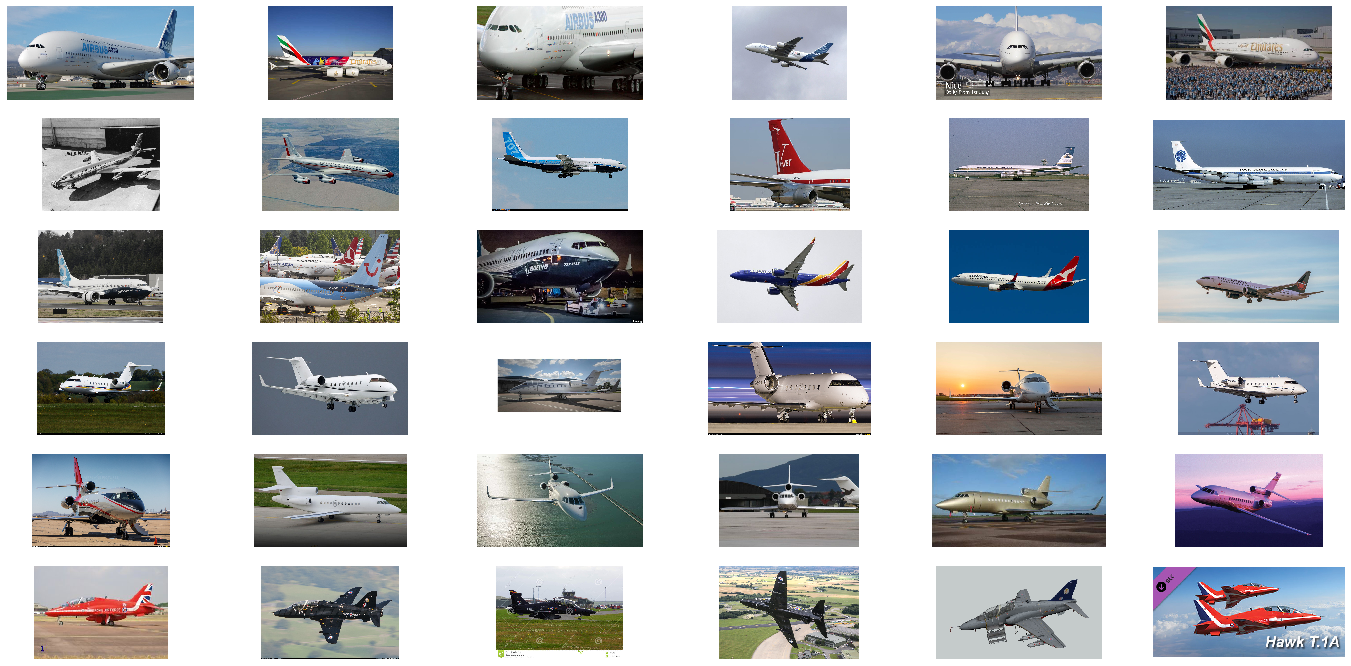

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 6
ncols = 6
pic_index = 0

# Set up matplotlib fig, and size it to fit 6x6 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 2)
#pic_index += 36
airbus_pix = [os.path.join(train_airbus, fname) 
                for fname in train_airbus_names[0:6]]
boeing707_pix = [os.path.join(train_boeing707, fname) 
                for fname in train_boeing707_names[0:6]]
boeing737_pix = [os.path.join(train_boeing737, fname) 
                for fname in train_boeing737_names[0:6]]
challenger_pix = [os.path.join(train_challenger, fname) 
                for fname in train_challenger_names[0:6]]
falcon_pix = [os.path.join(train_falcon, fname) 
                for fname in train_falcon_names[0:6]]
hawk_pix = [os.path.join(train_hawk, fname) 
                for fname in train_hawk_names[0:6]]

for i, img_path in enumerate(airbus_pix + boeing707_pix + boeing737_pix + challenger_pix + falcon_pix + hawk_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D((4, 4),strides=(2,2)),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(6, activation='softmax')
])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/home/bipinpanwar55/anaconda3/aircraft_classification/data/train/',  # This is the source directory for training images
        target_size=(100, 100),  # All images will be resized to 150x150
        batch_size=64,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 480 images belonging to 6 classes.


In [0]:
training = model.fit_generator(
      train_generator,
      steps_per_epoch=16,  
      epochs=15,
      verbose=1)

Epoch 1/15
16/16 [==============================] - 25s 2s/step - loss: 1.8044 - accuracy: 0.1958
Epoch 2/15
16/16 [==============================] - 24s 2s/step - loss: 1.7134 - accuracy: 0.2812
Epoch 3/15
16/16 [==============================] - 24s 1s/step - loss: 1.5506 - accuracy: 0.3594
Epoch 4/15
16/16 [==============================] - 25s 2s/step - loss: 1.3635 - accuracy: 0.4479
Epoch 5/15
16/16 [==============================] - 24s 1s/step - loss: 1.2374 - accuracy: 0.5198
Epoch 6/15
16/16 [==============================] - 26s 2s/step - loss: 1.0783 - accuracy: 0.5875
Epoch 7/15
16/16 [==============================] - 24s 1s/step - loss: 0.9691 - accuracy: 0.6198
Epoch 8/15
16/16 [==============================] - 26s 2s/step - loss: 0.8373 - accuracy: 0.7021
Epoch 9/15
16/16 [==============================] - 25s 2s/step - loss: 0.5901 - accuracy: 0.7958
Epoch 10/15
16/16 [==============================] - 29s 2s/step - loss: 0.4323 - accuracy: 0.8531
Epoch 11/15
16/16 [

In [0]:
model.save_weights('model_saved.h5') 

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

test_dir = os.path.join('/home/bipinpanwar55/anaconda3/aircraft_classification/data/test')
test_names = os.listdir(test_dir)
#uploaded = files.upload()

for fn in test_names:
    # predicting images
    #path = '/content/' + fn
    path = '/home/bipinpanwar55/anaconda3/aircraft_classification/data/test/' + fn
    img = image.load_img(path, target_size=(100, 100))
    img = image.img_to_array(img)
    #img = img/255
    x = np.expand_dims(img, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images,batch_size=10)
    print(classes[0])
    if classes[0]<0.5:
        print(fn + " is a airbus A380")
    elif classes[0]>=0.5 and classes[0]<1.5:
        print(fn + " is a boeing 707") 
    elif classes[0]>=1.5 and classes[0]<2.5:
        print(fn + " is a boeing 737")
    elif classes[0]>=2.5 and classes[0]<3.5:
        print(fn + " is a challenger 600")
    elif classes[0]>=3.5 and classes[0]<4.5:
        print(fn + " is a falcon 900")
    else :
        print(fn + " is a hawk T1")
    

2
83.jpg is a boeing 737
4
171.jpg is a falcon 900
4
159.jpg is a falcon 900
2
145.jpg is a boeing 737
3
197.jpg is a challenger 600
1
95.jpg is a boeing 707
1
130.jpg is a boeing 707
3
133.jpg is a challenger 600
1
87.jpg is a boeing 707
1
113.jpg is a boeing 707
3
119.png is a challenger 600
1
101.jpg is a boeing 707
3
92.jpg is a challenger 600
4
154.jpg is a falcon 900
3
99.jpg is a challenger 600
1
169.jpg is a boeing 707
3
195.jpg is a challenger 600
1
82.jpg is a boeing 707
4
180.jpg is a falcon 900
4
160.jpg is a falcon 900
3
105.jpg is a challenger 600
3
81.jpg is a challenger 600
2
115.jpg is a boeing 737
5
181.jpg is a hawk T1
3
142.jpg is a challenger 600
5
182.jpg is a hawk T1
4
191.jpg is a falcon 900
4
164.jpg is a falcon 900
4
157.jpg is a falcon 900
4
196.jpg is a falcon 900
0
138.jpg is a airbus A380
1
176.jpg is a boeing 707
5
187.jpg is a hawk T1
1
158.jpg is a boeing 707
3
184.jpg is a challenger 600
5
190.jpg is a hawk T1
3
116.jpg is a challenger 600
4
150.jpg is